In [2]:
import requests
from bs4 import BeautifulSoup

In [176]:
def article_crawler(url):
    """
    Input:
           url -> https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html
    
    Output:
           article_dict -> {'url': "https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html",
                            'title': "Re: [討論] 看完雷霆火箭G4，鬍龜隊友真的差不多嗎?",
                            'author': "griefman (小蟻天)",
                            'tm': "Mon Apr 24 15:51:07 2017"
                            'board': "NBA",
                            'ip': '127.0.0.1,
                            'content': "※ 引述《adonistao (三部五十)》之銘言：
                                        : ※ 引述《Turtle100 (龜龜100)》之銘言：
                                        : : 差很多
                                        : : 先說結論
                                        : : 跟鬍子打球:
                                        : : 你覺得火箭每個人都是巨頭 。
                                        : : 跟西河打球:.............................",
                            'push': [
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                            ]}
                            
    Note:
            文章內容，與其用精準的selector，不如把不相干的（或是已經爬下來的）Tag給刪掉。
            https://www.crummy.com/software/BeautifulSoup/bs4/doc/#decompose
    
    """
    article_dict = {}
    
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    meta_lines = soup.select('div.article-metaline > span')
    article_dict['author'] = meta_lines[1].text
    article_dict['title']  = meta_lines[3].text
    article_dict['tm']     = meta_lines[5].text
    article_dict['board']  = soup.select('div.article-metaline-right > span')[1].text
    
    pushs = []
    for push in soup.select('div.push'):
        push_dict = {}
        push_dict['push_type']    = push.select_one('.push-tag').text.strip()
        push_dict['push_author']  = push.select_one('.push-userid').text.strip()
        push_dict['push_content'] = push.select_one('.push-content').text.replace(': ', '')
        push_dict['push_tm']      = push.select_one('.push-ipdatetime').text.strip()
        pushs.append(push_dict)
    
    article_dict['pushs'] = pushs
    
    for trash in soup.select('div.article-metaline > span') + soup.select('div.article-metaline-right > span') + soup.select('div.push'):
        trash.decompose()
        
    content_raw = soup.select_one('#main-content').text.strip()
    article_dict['ip']      = content_raw.split(', 來自: ')[1].split('\n※ 文章網址:')[0]
    article_dict['content'] = content_raw.split('\n※ 發信站')[0]
    
    return article_dict

In [47]:
nba_data = article_crawler("https://www.ptt.cc/bbs/NBA/M.1493231113.A.172.html")

In [48]:
nba_data['tm']

'Thu Apr 27 02:25:07 2017'

In [49]:
nba_data['title']

'[外絮] NBA算你們走運 - Dion Waiters'

In [50]:
nba_data

{'author': 'yiyi7443 (不捨)',
 'board': 'NBA',
 'content': "The NBA Is Lucky I’m Home Doing Damn Articles\n\n日\u3000\u3000期：APR 25 2017\n作\u3000\u3000者：Dion Waiters(現役邁阿密熱火隊後衛)\n原文連結：\nhttps://www.theplayerstribune.com/dion-waiters-miami-heat-nba-is-lucky/\nhttp://i.imgur.com/kMFQmKm.jpg\n\nY'all seen Casino, right?\n\n你們都看過《賭國風雲》這部電影吧？\n\nYou know, the one with Robert De Niro and Joe Pesci in Vegas? Anyway — that\none.\n\n勞勃狄尼洛和喬派西在拉斯維加斯的那部就是了。\n\nIf you want to know what it’s like to meet Pat Riley, you need to watch that\nmovie.\n\n如果你想知道和帕特萊利會面的感覺，一定要看這部電影。\n\nWhen I heard that Miami was interested in me this summer, I wasn’t really\nseeing it at first. Nothing against the Heat, but I didn’t know how I’d fit\nthere.\n\n當我知道邁阿密對我有意思的時候，我一開始沒什麼興趣。\n不是對熱火有意見，只是不曉得自己適不適合那裡。\n\nThen I met Pat Riley.\n\n然後我見到了帕特萊利。\n\nI walked into his office and … damn. The hair was slicked back, and he was\nwearing one of those suits of his, you know, real O.G., looking like a\nmillion bucks. Behind him,

In [52]:
# Javascrpt rendered websites....

In [53]:
res = requests.get('https://www.airbnb.com.tw/')

In [54]:
res

<Response [200]>

In [56]:
with open('./airbnb.html', 'w') as f:
    f.write(res.text)

In [93]:
# honestbee
from lib import toolbox
headers = toolbox.gen_header("""Accept:application/vnd.honestbee+json;version=2
Accept-Encoding:gzip, deflate, sdch, br
Accept-Language:en
Cache-Control:no-cache
Connection:keep-alive
Cookie:ajs_group_id=null; ajs_anonymous_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ajs_user_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ab.storage.sessionId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%22abab41b5-ed84-c5db-c152-faf0b087f13c%22%2C%22e%22%3A1493261233665%2C%22c%22%3A1493259433665%2C%22l%22%3A1493259433665%7D; ab.storage.deviceId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%2290381acb-7bfa-0249-d8f8-e228102b68a8%22%2C%22c%22%3A1493259433670%2C%22l%22%3A1493259433670%7D; _uetsid=_uetc75a543d; _TUCI_T=sessionNumber+17283&pageView+17283; _TUCS=1; _TUCI=sessionNumber+1000&ECId+727&hostname+honestbee.tw&pageView+1000&Member; _omappvp=true; _omappvs=true; _ga=GA1.2.686160775.1493259433; om-531426=true
Host:honestbee.tw
Pragma:no-cache
Referer:https://honestbee.tw/en/
User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36""")


res = requests.get("https://honestbee.tw/api/api/stores/547?sort=ranking&pageSize=48&page=2",
                  headers=headers)

In [94]:
res

<Response [200]>

In [96]:
res.json()['products']

[{'alcohol': False,
  'amountPerUnit': '1.0',
  'barcode': None,
  'countryOfOrigin': None,
  'currency': 'TWD',
  'description': None,
  'descriptionHtml': None,
  'id': 1075206,
  'imageUrl': 'https://assets.honestbee.com/products/images/480/thomas-meat_88010018_88010018-1.jpg',
  'imageUrlBasename': 'thomas-meat_88010018_88010018-1.jpg',
  'normalPrice': '212.0',
  'nutritionalInfo': None,
  'packingSize': None,
  'previewImageUrl': 'https://assets.honestbee.com/products/images/480/thomas-meat_88010018_88010018-1.jpg',
  'price': '212.0',
  'productBrand': None,
  'productInfo': None,
  'promotionEndsAt': None,
  'promotionStartsAt': None,
  'size': '350 - 370 g',
  'slug': None,
  'soldBy': 'sold_by_item',
  'status': 'status_available',
  'tags': [],
  'title': 'Duck breast',
  'unitType': 'unit_type_item'},
 {'alcohol': False,
  'amountPerUnit': '300.0',
  'barcode': None,
  'countryOfOrigin': None,
  'currency': 'TWD',
  'description': None,
  'descriptionHtml': None,
  'id': 10

In [97]:
!pip install splinter

In [144]:
from splinter import Browser

browser = Browser('chrome')

url = "http://www.google.com"
# browser.visit(url)
# browser.fill('q', 'ianchenhq\n')
# if browser.is_text_present('ianchenhq.com'):
#     print("Yes, the blog website was found!")
# else:
#     print("No, it wasn't found... We need to improve our SEO techniques")

In [141]:
browser.visit("http://google.com")

In [142]:
search_input = browser.find_by_xpath('//*[@id="lst-ib"]')[0]

In [115]:
type(search_input)

splinter.driver.webdriver.WebDriverElement

In [118]:
search_input.fill('ianchenhq\n')

In [119]:
browser.is_text_present('https://ianchenhq.com')

True

In [121]:
blog_link = browser.find_by_xpath('//*[@id="rso"]/div/div/div[6]/div/div/h3/a')[0]

In [122]:
type(blog_link)

splinter.driver.webdriver.WebDriverElement

In [123]:
blog_link.click()

In [127]:
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')

In [130]:
browser.execute_script('window.scrollTo(0, 250)')

In [131]:
browser.screenshot('./ianchenhq.png')

'/var/folders/bv/x472ln0x6fd0vl_1y4v8gkm00000gn/T/ianchenhq.pngscmvb5as.png'

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" itemscope="" itemtype="http://schema.org/WebPage" lang="zh-TW"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image" /><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon" /><meta content="origin" id="mref" name="referrer" /><title>ianchenhq - Google 搜尋</title>   <script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.DTPeBB_SvOA.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-J3J0yqNDMPVrmQT6j-SBFfGx8oA/cb=gapi.loaded_0" async=""></script><script>(function(){window.google={kEI:\'toQBWc30JYTs0gSY_KVY\',kEXPI:\'201761,1352863,1352993,1353095,3700266,3700347,3700405,4029815,4031109,4032677,4036527,4038214,4038394,4039268,4041776,4043492,4045096,4045293,4045839,4046904,4047140,4047454,4048347,4048980,4050750,4051887,4056126,4056682,4058016,4061666,4061980,4062724,4064468,4064796,4065786,4066197,4069829,4071757,4072270,
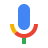
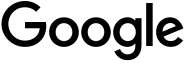

In [132]:
browser.html

In [133]:
soup = BeautifulSoup(browser.html, 'lxml')

In [137]:
for link in soup.select("h3.r > a"):
    print(link['href'])

https://www.facebook.com/ianchenhq/
https://www.facebook.com/Ianchenhq-194104291104385/info
https://github.com/ianchen06/ianchenhq
https://github.com/ianchen06
https://ianchenhq.com/about
https://ianchenhq.com/
https://ianchenhq.com/en/blog/linux-router-firewall-cont
https://certificatedetails.com/d2a716207cafd9959eeb430a19f2e0b9740ea8c7/58dd7ddef07154dfae77ba479a57749f/mx.ianchenhq.com
https://ianchen06.github.io/
http://www.crimeflare.com/cgi-bin/cfdom2.cgi/tw111.248.110


In [139]:
browser.quit()

In [146]:
with Browser('chrome') as browser:
    browser.visit('https://ianchenhq.com')
    blog = browser.html

In [147]:
blog

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml"><head>\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<script type="text/javascript" async="" data-rocketsrc="https://ssl.google-analytics.com/ga.js" data-rocketoptimized="true"></script><script type="text/javascript">\n//&lt;![CDATA[\ntry{if (!window.CloudFlare) {var CloudFlare=[{verbose:0,p:0,byc:0,owlid:"cf",bag2:1,mirage2:0,oracle:0,paths:{cloudflare:"/cdn-cgi/nexp/dok3v=1613a3a185/"},atok:"eee958607c09c46741dda74bf3ea8b8e",petok:"6ff760d6429e7ca49dd23f8f69a6dfc9132b6975-1493273032-1800",zone:"ianchenhq.com",rocket:"a",apps:{}}];document.write(\'&lt;script type="text/javascript" src="//ajax.cloudflare.com/cdn-cgi/nexp/dok3v=85b614c0f6/cloudflare.min.js"&gt;&lt;\'+\'\\/script&gt;\');}}catch(e){};\n//]]&gt;\n</script><script type="text/javascript" src="//ajax.cloudflare.com/cdn-cgi/nexp/dok3v=85b614c0f6/cloudf

In [150]:
browser = Browser('chrome')

In [151]:
browser.visit("https://www.skyscanner.com.tw")

In [152]:
dest = browser.find_by_xpath('//*[@id="js-destination-input"]')[0]

In [153]:
dest.fill('Narita')

In [154]:
dept_date = browser.find_by_xpath('//*[@id="js-depart-input"]')[0]

In [156]:
dept_date = browser.find_by_xpath('//*[@id="category-flights"]/div[12]/div/div/div[2]/div/section/div[2]/table/tbody/tr[6]/td[1]/a')[0]

In [157]:
dept_date.click()

In [158]:
browser.find_by_xpath('//*[@id="js-return-input"]')[0]

In [159]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[1]/button[2]')[0].click()

In [161]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[2]/table/tbody/tr[1]/td[3]/a')[0].click()

In [164]:
browser.find_by_xpath('//*[@id="js-search-controls-container"]/form/section[2]/button/span[1]')[0].click()

In [165]:
browser.html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" class="skyscanner  legacy-button  bpk-no-touch-support" lang="zh-TW"><head><script src="https://pagead2.googlesyndication.com/pagead/osd.js"></script><script type="text/javascript" async="">var i = document.createElement(\'img\');    i.setAttribute(\'alt\', \'\');    i.setAttribute(\'height\', \'1\');    i.setAttribute(\'width\', \'1\');    i.setAttribute(\'style\', \'display: none;\');    i.setAttribute(\'src\', \'https://cm.g.doubleclick.net/pixel?google_nid=sojern__adx_open_bidder_seat&amp;google_hm=cf3uLX2nX6zewrYOGEAlrg&amp;google_ula=&amp;google_cm&amp;google_sc&amp;sjrn_id=ZxWmeRyWuIEuN84tP5oTR3_Pwxid7zBLTdBzpJ8YLhdm4-UEOrGZlbWJB-6bj9F_\');    document.body.appendChild(i);</script><script type="text/javascript" async="" src="//www.googleadservices.com/pagead/conversion_async.js"></script><script type="text/javascript" async="" src="https://pixel.sojern.com/partner/lq6MFTSoyPN6xuPc/fs?fa1=TPE&amp;fa2=NRT&amp;fd1=2017-04-3

In [166]:
soup = BeautifulSoup(browser.html, 'lxml')

In [167]:
soup.select('div.card-body')

[<div class="card-body clearfix"><div class="clearfix carrier"><div class="airline"><img alt="台灣虎航" onerror="__imgErrRemove__(this)" src="//logos.skyscnr.com/images/airlines/favicon/IT.png"/><span>台灣虎航</span></div></div><section class="card-main leg clearfix dept" data-id="0"><div class="big-airline"><img alt="台灣虎航" class="big" data-name="台灣虎航" onerror="__logoReplace__(this)" src="//logos.skyscnr.com/images/airlines/small/IT.png"/></div><div class="leg-details"><div class="depart"><span class="station-tooltip" data-id="17075"><span class="times">06:35</span><span class="stop-station" data-id="17075">TPE</span></span></div><div class="stops"><span class="duration">3 小時 10 分鐘</span><ul class="stop-line"><li class="stop-line"></li></ul><div class="leg-stops no-stops"><span class="leg-stops-green leg-stops-label">直飛 </span><span class="leg-stops-station"></span></div></div><div class="arrive"><span class="station-tooltip" data-id="14788"><span class="times">10:45</span><span class="stop-st

In [170]:
browser.find_by_xpath('//*[@id="day-section"]/div/div[3]/div[9]/div[2]/ul/li[6]/button')[0].click()

ElementDoesNotExist: no elements could be found with xpath "//*[@id="day-section"]/div/div[3]/div[9]/div[2]/ul/li[6]/button"

In [171]:
browser = Browser('chrome')

In [172]:
browser.visit('https://www.indiegogo.com')

In [174]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[1]/nav/a[1]')[0].click()

In [175]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[4]/div/explore-detail/div/div[2]/div[4]/div[1]/div/a[1]/div[2]/div[1]/div[2]')[0].click()

# Python datetime transform

In [177]:
nba_data = article_crawler("https://www.ptt.cc/bbs/NBA/M.1493231113.A.172.html")

In [179]:
nba_data['tm']

'Thu Apr 27 02:25:07 2017'

In [202]:
from datetime import datetime, timedelta, timezone

In [182]:
datetime.now()

datetime.datetime(2017, 4, 27, 15, 22, 9, 927859)

In [183]:
datetime.now().hour

15

In [184]:
datetime.now().day

27

In [185]:
datetime.now().strftime("%Y-%m-%d %H:%M")

'2017-04-27 15:23'

In [187]:
nba_tm = datetime.strptime('Thu Apr 27 02:25:07 2017', "%a %b %d %H:%M:%S %Y")

In [188]:
nba_tm

datetime.datetime(2017, 4, 27, 2, 25, 7)

In [189]:
nba_tm.day

27

In [190]:
nba_tm.isoformat()

'2017-04-27T02:25:07'

In [193]:
nba_tm = article_crawler("https://www.ptt.cc/bbs/NBA/M.1491350418.A.B52.html")['tm']

In [194]:
nba_tm

'Wed Apr  5 08:00:15 2017'

In [196]:
tm_list = nba_tm.split()

In [197]:
tm_list

['Wed', 'Apr', '5', '08:00:15', '2017']

In [198]:
if len(tm_list[2]) == 1:
    tm_list[2] = '0' + tm_list[2]

In [199]:
tm_list

['Wed', 'Apr', '05', '08:00:15', '2017']

In [200]:
nba_tm = ' '.join(tm_list)

In [201]:
nba_tm

'Wed Apr 05 08:00:15 2017'

In [223]:
# timezone

taipei = timezone(+timedelta(hours=8))

tz_tm = datetime.now().replace(tzinfo=taipei)
tz_tm

datetime.datetime(2017, 4, 27, 15, 47, 23, 893240, tzinfo=datetime.timezone(datetime.timedelta(0, 28800)))

In [207]:
tz_tm.isoformat()

'2017-04-27T15:38:58.130500+08:00'

In [209]:
tz_tm.timestamp()

1493278738.1305

In [215]:
from dateutil import parser
# complete datetime ETL example
gym_data = []
with open('./datasets/gym.csv') as f:
    for idx, row in enumerate(f): # enumerate -> 得到for loop的index
        if idx == 0:
            header = row.strip().split(",")
        else:
            # zip(['key1', 'key2], [1,2]) -> (key1, 1), (key2, 2)
            # dictionary comprehension..
            row_dict = {k:v for k,v in zip(header, row.strip().split(","))}
            row_dict['timestamp'] = parser.parse(row_dict['timestamp'])
            gym_data.append(row_dict)
        print("NO %s - %s" % (idx, row.strip()))

NO 0 - timestamp,gym,gym_cap,pool,pool_cap,pool_temp
NO 1 - 2017-04-19T16:09:28.036365+08:00,45,120,58,300,29
NO 2 - 2017-04-19T16:10:02.452986+08:00,45,120,57,300,29
NO 3 - 2017-04-19T16:11:02.675977+08:00,44,120,56,300,29
NO 4 - 2017-04-19T16:12:01.910787+08:00,45,120,56,300,29
NO 5 - 2017-04-19T16:13:02.149363+08:00,45,120,54,300,29
NO 6 - 2017-04-19T16:14:02.360920+08:00,46,120,54,300,29
NO 7 - 2017-04-19T16:15:02.604950+08:00,47,120,49,300,29
NO 8 - 2017-04-19T16:16:01.835884+08:00,47,120,48,300,29
NO 9 - 2017-04-19T16:17:02.072483+08:00,48,120,45,300,29
NO 10 - 2017-04-19T16:18:02.311361+08:00,48,120,46,300,29
NO 11 - 2017-04-19T16:19:02.536762+08:00,48,120,46,300,29
NO 12 - 2017-04-19T16:20:02.769352+08:00,48,120,42,300,29
NO 13 - 2017-04-19T16:21:01.961884+08:00,48,120,43,300,29
NO 14 - 2017-04-19T16:22:02.354599+08:00,49,120,43,300,29
NO 15 - 2017-04-19T16:23:02.649469+08:00,49,120,42,300,29
NO 16 - 2017-04-19T16:24:01.939838+08:00,49,120,41,300,29
NO 17 - 2017-04-19T16:25:02.

In [216]:
gym_data

[{'gym': '45',
  'gym_cap': '120',
  'pool': '58',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 19, 16, 9, 28, 36365, tzinfo=tzoffset(None, 28800))},
 {'gym': '45',
  'gym_cap': '120',
  'pool': '57',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 19, 16, 10, 2, 452986, tzinfo=tzoffset(None, 28800))},
 {'gym': '44',
  'gym_cap': '120',
  'pool': '56',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 19, 16, 11, 2, 675977, tzinfo=tzoffset(None, 28800))},
 {'gym': '45',
  'gym_cap': '120',
  'pool': '56',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 19, 16, 12, 1, 910787, tzinfo=tzoffset(None, 28800))},
 {'gym': '45',
  'gym_cap': '120',
  'pool': '54',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 19, 16, 13, 2, 149363, tzinfo=tzoffset(None, 28800))},
 {'gym': '46',
  'gym_cap': '120',
  'pool': '54',


In [224]:
[row for row in gym_data if row['timestamp'] > datetime(year=2017, month=4, day=21, tzinfo=taipei)]

[{'gym': '5',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 21, 0, 0, 2, 230885, tzinfo=tzoffset(None, 28800))},
 {'gym': '0',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 21, 0, 1, 2, 517614, tzinfo=tzoffset(None, 28800))},
 {'gym': '0',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 21, 0, 2, 2, 155171, tzinfo=tzoffset(None, 28800))},
 {'gym': '0',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 21, 0, 3, 2, 423096, tzinfo=tzoffset(None, 28800))},
 {'gym': '0',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',
  'pool_temp': '29',
  'timestamp': datetime.datetime(2017, 4, 21, 0, 4, 2, 808699, tzinfo=tzoffset(None, 28800))},
 {'gym': '0',
  'gym_cap': '120',
  'pool': '0',
  'pool_cap': '300',


In [225]:
!pip install arrow

In [226]:
import arrow

In [228]:
nba_tm = arrow.Arrow.strptime("Wed Apr 05 08:00:15 2017", "%a %b %d %H:%M:%S %Y", tzinfo='Asia/Taipei')

In [232]:
nba_tm.timestamp

1491350415

In [234]:
nba_tm.isoformat()

'2017-04-05T08:00:15+08:00'

In [242]:
arrow.get("Wed Apr 05 08:00:15 2017", 'ddd MMM DD HH:mm:ss YYYY', tzinfo='Asia/Taipei').isoformat()

'2017-04-05T08:00:15+08:00'

# Pandas

In [307]:
!pip install pandas

In [308]:
import pandas as pd

In [309]:
df = pd.read_csv('./datasets/gym.csv')

In [310]:
df.head(10)

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19T16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
1,2017-04-19T16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2,2017-04-19T16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
3,2017-04-19T16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
4,2017-04-19T16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29
5,2017-04-19T16:14:02.360920+08:00,46.0,120.0,54.0,300.0,29
6,2017-04-19T16:15:02.604950+08:00,47.0,120.0,49.0,300.0,29
7,2017-04-19T16:16:01.835884+08:00,47.0,120.0,48.0,300.0,29
8,2017-04-19T16:17:02.072483+08:00,48.0,120.0,45.0,300.0,29
9,2017-04-19T16:18:02.311361+08:00,48.0,120.0,46.0,300.0,29


In [311]:
df = pd.read_csv('./datasets/gym.csv', parse_dates=['timestamp'])

In [312]:
df.head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19 08:09:28.036365,45.0,120.0,58.0,300.0,29
1,2017-04-19 08:10:02.452986,45.0,120.0,57.0,300.0,29
2,2017-04-19 08:11:02.675977,44.0,120.0,56.0,300.0,29
3,2017-04-19 08:12:01.910787,45.0,120.0,56.0,300.0,29
4,2017-04-19 08:13:02.149363,45.0,120.0,54.0,300.0,29


In [313]:
df.head()['timestamp']

0   2017-04-19 08:09:28.036365
1   2017-04-19 08:10:02.452986
2   2017-04-19 08:11:02.675977
3   2017-04-19 08:12:01.910787
4   2017-04-19 08:13:02.149363
Name: timestamp, dtype: datetime64[ns]

In [314]:
# custom datetime parser
#
# def ________(x):
#     return pd.Timestamp(x)
tz_parser = lambda x: parser.parse(x)

In [315]:
tz_parser('2017-04-19T16:14:02.360920+08:00')

datetime.datetime(2017, 4, 19, 16, 14, 2, 360920, tzinfo=tzoffset(None, 28800))

In [316]:
df = pd.read_csv('./datasets/gym.csv', parse_dates=['timestamp'], date_parser=tz_parser)

In [317]:
df.head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19 16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
1,2017-04-19 16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2,2017-04-19 16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
3,2017-04-19 16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
4,2017-04-19 16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29


In [318]:
df.head()['timestamp']

0   2017-04-19 16:09:28.036365+08:00
1   2017-04-19 16:10:02.452986+08:00
2   2017-04-19 16:11:02.675977+08:00
3   2017-04-19 16:12:01.910787+08:00
4   2017-04-19 16:13:02.149363+08:00
Name: timestamp, dtype: datetime64[ns, tzoffset(None, 28800)]

In [319]:
df[(df.timestamp > '2017-04-21 00:00+0800') & (df.timestamp < '2017-04-22 00:00+0800')]

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
1910,2017-04-21 00:00:02.230885+08:00,5.0,120.0,0.0,300.0,29
1911,2017-04-21 00:01:02.517614+08:00,0.0,120.0,0.0,300.0,29
1912,2017-04-21 00:02:02.155171+08:00,0.0,120.0,0.0,300.0,29
1913,2017-04-21 00:03:02.423096+08:00,0.0,120.0,0.0,300.0,29
1914,2017-04-21 00:04:02.808699+08:00,0.0,120.0,0.0,300.0,29
1915,2017-04-21 00:05:02.219316+08:00,0.0,120.0,0.0,300.0,29
1916,2017-04-21 00:06:02.704037+08:00,0.0,120.0,0.0,300.0,29
1917,2017-04-21 00:07:02.111794+08:00,0.0,120.0,0.0,300.0,29
1918,2017-04-21 00:08:02.368053+08:00,0.0,120.0,0.0,300.0,29
1919,2017-04-21 00:09:02.676279+08:00,0.0,120.0,0.0,300.0,29


In [320]:
df.index = df['timestamp']

In [321]:
df.head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-19 16:09:28.036365+08:00,2017-04-19 16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
2017-04-19 16:10:02.452986+08:00,2017-04-19 16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2017-04-19 16:11:02.675977+08:00,2017-04-19 16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
2017-04-19 16:12:01.910787+08:00,2017-04-19 16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
2017-04-19 16:13:02.149363+08:00,2017-04-19 16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29


In [322]:
df[['gym']].plot()

In [323]:
import matplotlib.pyplot as plt

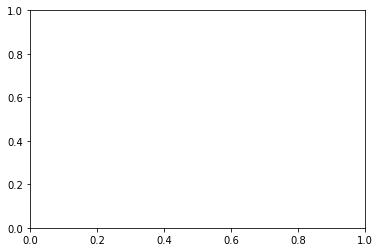

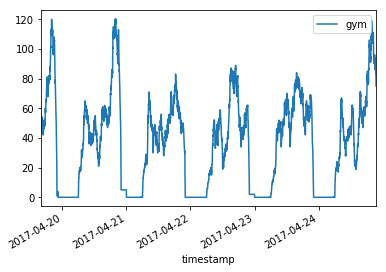

In [324]:
plt.show()

In [325]:
df[['gym', 'pool']].plot()

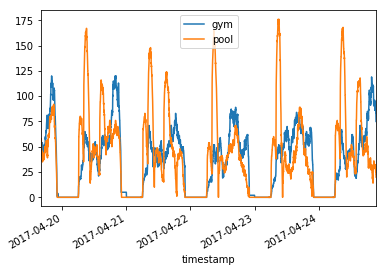

In [326]:
plt.show()

In [327]:
df['2017-04-21'][['gym', 'pool']].plot()

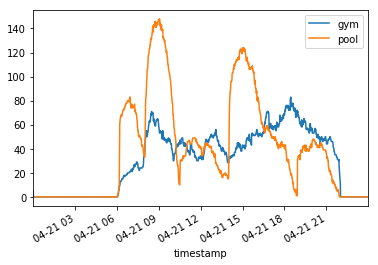

In [328]:
plt.show()

In [329]:
df['2017-04-22'].head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-22 00:00:02.389525+08:00,2017-04-22 00:00:02.389525+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:01:02.841987+08:00,2017-04-22 00:01:02.841987+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:02:02.207801+08:00,2017-04-22 00:02:02.207801+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:03:02.535768+08:00,2017-04-22 00:03:02.535768+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:04:02.845457+08:00,2017-04-22 00:04:02.845457+08:00,0.0,120.0,0.0,300.0,29


In [330]:
df[df.gym > 60]

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-19 17:50:02.673258+08:00,2017-04-19 17:50:02.673258+08:00,61.0,120.0,49.0,300.0,29
2017-04-19 17:52:02.350302+08:00,2017-04-19 17:52:02.350302+08:00,62.0,120.0,51.0,300.0,29
2017-04-19 17:53:02.684595+08:00,2017-04-19 17:53:02.684595+08:00,62.0,120.0,51.0,300.0,29
2017-04-19 17:54:02.027787+08:00,2017-04-19 17:54:02.027787+08:00,62.0,120.0,50.0,300.0,29
2017-04-19 17:55:02.292667+08:00,2017-04-19 17:55:02.292667+08:00,64.0,120.0,50.0,300.0,29
2017-04-19 17:56:02.569736+08:00,2017-04-19 17:56:02.569736+08:00,65.0,120.0,52.0,300.0,29
2017-04-19 17:57:02.775049+08:00,2017-04-19 17:57:02.775049+08:00,66.0,120.0,51.0,300.0,29
2017-04-19 17:58:02.059802+08:00,2017-04-19 17:58:02.059802+08:00,65.0,120.0,50.0,300.0,29
2017-04-19 17:59:02.437997+08:00,2017-04-19 17:59:02.437997+08:00,65.0,120.0,51.0,300.0,29


In [331]:
for d in range(22,19,-1):
    df['2017-04-%s'%d][['gym', 'pool']].plot()

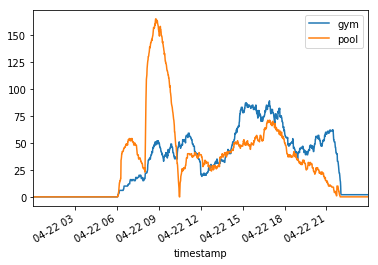

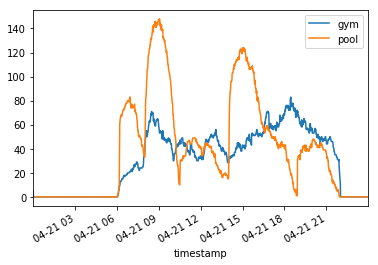

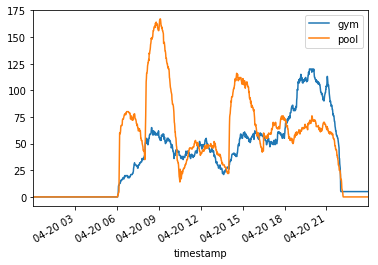

In [332]:
plt.show()

In [333]:
df.resample('d').mean()

,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,
2017-04-19 00:00:00+08:00,55.845011,120.0,43.949045,300.0,29
2017-04-20 00:00:00+08:00,37.712300,120.0,46.706741,300.0,29
2017-04-21 00:00:00+08:00,30.841557,120.0,39.448923,300.0,29
2017-04-22 00:00:00+08:00,31.234028,120.0,33.046528,300.0,29
2017-04-23 00:00:00+08:00,34.373871,120.0,35.503822,300.0,29
2017-04-24 00:00:00+08:00,39.046548,120.0,45.246703,300.0,29


In [334]:
df = pd.read_csv('./datasets/result.csv', error_bad_lines=False)

b'Skipping line 9939: expected 19 fields, saw 26\n'


In [288]:
df.head()

,id,資料集名稱,服務分類,檔案格式,下載連結,資料類型,資料集描述,主要欄位說明,提供機關,更新頻率,授權方式,授權說明網址,計費方式,編碼格式,資料集提供機關聯絡人,資料集提供機關聯絡人電話,發布時間,修訂時間,備註
0,5943,蒙藏委員會補助團體私人情形季報表,公共資訊,CSV,http://www.mtac.gov.tw/pages/283/MTAC005.csv,rawData,蒙藏委員會補助團體私人情形季報表,補助對象、補助事項或用途、補助金額、核准日期,蒙藏委員會,每季,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,蕭先生,02-23566461,2014/01/01 01:19:16,2016/08/02 19:57:32,NaN
1,5944,蒙藏用語對照表,公共資訊,壓縮檔,http://www.mtac.gov.tw/pages/283/MTAC004.zip;h...,rawData,蒙藏用語對照表,類別、蒙文、藏文、英文譯名、中文譯名,蒙藏委員會,半年,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;;UTF-8,蕭先生,02-23566461,2014/01/01 01:19:16,2016/11/02 09:58:16,NaN
2,5945,西藏統計資料,公共資訊,CSV,http://www.mtac.gov.tw/pages/283/MTAC002.csv,rawData,大陸藏族聚居區人口分布表西藏自治區及西藏流亡組織重要人事資料國外藏族人口分布情形在臺藏胞及居...,戶數、人口數,蒙藏委員會,半年,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8,蕭先生,02-23566461,2014/01/01 01:19:16,2016/05/23 23:40:42,NaN
3,5946,蒙古統計資料,公共資訊,TXT,http://www.mtac.gov.tw/pages/283/MTAC001.txt,rawData,在臺蒙胞人口數統計表蒙古國基本資料,戶數、人口數,蒙藏委員會,半年,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8,蕭先生,02-23566461,2014/01/01 01:19:16,2016/05/23 23:40:42,NaN
4,5947,蒙藏委員會性別主流化訓練統計表,公共資訊,CSV,http://www.mtac.gov.tw/pages/283/MTAC003.csv,rawData,蒙藏委員會性別主流化訓練統計表,序號、參加人數、性別、性別主流化類訓練名稱、日期、總時數、主辦機關,蒙藏委員會,1年,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,蕭先生,02-23566461,2014/01/01 01:19:16,2016/05/23 23:40:42,NaN


In [293]:
df[df['更新頻率'].str.contains('分鐘', na=False)]

,id,資料集名稱,服務分類,檔案格式,下載連結,資料類型,資料集描述,主要欄位說明,提供機關,更新頻率,授權方式,授權說明網址,計費方式,編碼格式,資料集提供機關聯絡人,資料集提供機關聯絡人電話,發布時間,修訂時間,備註
35,5981,水利防災資訊,公共資訊,KML,http://fhy.wra.gov.tw/Pub_Web_2011/kml/WRAWarm...,rawData,水利署整合了氣象、雨量、警戒、災情、崩塌、監控、淹水潛勢、土石流和水文水資源等資訊，提供KM...,警戒原因、地區、範圍、時間。雨量、水位警戒值、水位高、洩洪資訊、淹水潛勢,經濟部水利署,惟有告警事件時每10分鐘才會更新一次,政府資料開放授權條款－第1版,http://data.gov.tw/?q=principle,免費,UTF-8,陳先生,02-37073100,2014/01/01 01:19:16,2017/03/29 19:04:43,NaN
36,5982,防災資訊_淹水警戒,公共資訊,KML,http://fhy.wra.gov.tw/Pub_Web_2011/kml/WRAWarm...,rawData,經濟部水利署災害緊急應變小組，運用長期防災應變等相關經驗，進一步結合雨量、水位、水庫等即時資...,警戒原因、時間、地區、範圍,經濟部水利署,惟有告警事件時每10分鐘才會更新一次,政府資料開放授權條款－第1版,http://data.gov.tw/?q=principle,免費,UTF-8,陳先生,02-37073100,2014/01/01 01:19:16,2017/03/29 19:05:31,NaN
37,5983,防災資訊_河川警戒,公共資訊,KML,http://fhy.wra.gov.tw/Pub_Web_2011/kml/WRAWarm...,rawData,經濟部水利署災害緊急應變小組，運用長期防災應變等相關經驗，進一步結合雨量、水位、水庫等即時資...,河川名稱、時間、水位(公尺),經濟部水利署,惟有告警事件時每10分鐘才會更新一次,政府資料開放授權條款－第1版,http://data.gov.tw/?q=principle,免費,UTF-8,陳先生,02-37073100,2014/01/01 01:19:16,2017/03/29 19:06:07,NaN
38,5984,防災資訊_水庫洩洪警戒,公共資訊,KML,http://fhy.wra.gov.tw/Pub_Web_2011/kml/WRAWarm...,rawData,經濟部水利署災害緊急應變小組，運用長期防災應變等相關經驗，進一步結合雨量、水位、水庫等即時資...,水庫名稱、時間、水位(公尺)、洩洪量(cms)、預計洩洪區域、警戒區域,經濟部水利署,惟有告警事件時每10分鐘才會更新一次,政府資料開放授權條款－第1版,http://data.gov.tw/?q=principle,免費,UTF-8,陳先生,02-37073100,2014/01/01 01:19:16,2017/03/29 19:06:45,NaN
114,6080,環境即時通,生活安全及品質,其他,http://www.epa.gov.tw/app/emsg.html,apps,利用適地（location-based）功能，根據使用者目前所在地之座標資料，提供環保署及中...,空氣品質即時監測值、紫外線即時監測值、鄉鎮天氣、豪(大)雨特報、地震報告、沙塵訊息等。,行政院環境保護署,資料每10分鐘更新,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,黃先生,02-23117722#2334,2014/01/01 01:19:53,2016/11/24 12:17:09,NaN
128,6094,核能電廠運轉資訊,公共資訊,CSV,http://www.aec.gov.tw/open/spds.csv,rawData,提供目前核能電廠運轉狀態、反應爐功率、發電量等即時資訊。,資料時間、廠別及機組、運轉狀態、反應爐功率(%)、發電量(MWe),行政院原子能委員會,每分鐘,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,戈先生,02-22322294,2014/01/01 01:20:12,2016/05/23 23:40:42,NaN
129,6095,全國環境輻射偵測,公共資訊,CSV,http://www.aec.gov.tw/open/gammamonitor.csv,rawData,提供全國46個輻射監測站之即時監測值,監測站、監測站(英文)、監測值(微西弗/時)、時間、GPS經度、GPS緯度,行政院原子能委員會,每5分鐘,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,黃先生,07-3709206#126,2014/01/01 01:20:12,2017/03/29 14:28:37,NaN
183,6159,中央氣象局雷達回波,生活安全及品質,PNG,https://alerts.ncdr.nat.gov.tw/DownLoadNewAssi...,rawData,約於氣象雷達開始掃描15分鐘後，可產生新的雷達合成圖。,RADAR雷達回波,國家災害防救科技中心,每10分鐘,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,;PNG,蔡先生,02-23491000,2014/01/01 01:20:41,2016/05/23 23:40:42,NaN
184,6160,中央氣象局雨量觀測-日累積圖,生活安全及品質,PNG,https://alerts.ncdr.nat.gov.tw/DownLoadNewAssi...,rawData,雨量觀測日累積圖,日累積雨量圖,國家災害防救科技中心,每30分鐘,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,;PNG,蔡先生,02-23491000,2014/01/01 01:20:41,2016/05/23 23:40:42,NaN
185,6161,中央氣象局雨量站觀測資料,生活安全及品質,KML,https://alerts.ncdr.nat.gov.tw/DownLoadNewAssi...,rawData,每10分鐘雨量站觀測資料。,每10分鐘雨量站觀測資料。,國家災害防救科技中心,每10分鐘,政府資料開放授權條款-第1版,http://data.gov.tw/license,免費,UTF-8;,蔡先生,02-23491000,2014/01/01 01:20:41,2016/06/16 18:14:53,NaN


In [294]:
# Regular Expression
import re

In [305]:
# 測試是否整個string都match pattern
re.match('\w*@', 'ianchen06@gmail.com')[0]

'ianchen06@'

In [304]:
# 自傳內符合規則的部分
re.findall('[a-z0-9]+@[a-z0-9]+\.[a-z0-9]+', 'asdfasdfs,ian@gmail.com,,,232jasdfosdf')

['ian@gmail.com']